In [2]:
#0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ap = pd.DataFrame(data = pd.read_csv('C:/Users/cielo/Workspace/practice/hw1/Air_Pollution_Data.csv'))
cg = pd.DataFrame(data = pd.read_csv('C:/Users/cielo/Workspace/practice/hw1/CDC_Cigarette_Smoking_Data.csv'))
cr = pd.DataFrame(data = pd.read_csv('C:/Users/cielo/Workspace/practice/hw1/CDC_Lung_Cancer_Data.csv'))

ap.columns = ['State', 'Air pollution level CDC 2006 Data (except AZ and WI)']
cr.columns = ['State', 'Cases Lung Cancer per 100000 CDC Data 2006 (except AZ and WI)']

In [3]:
df_w = pd.merge(ap, cg, how = 'inner', on = 'State')
df = pd.merge(df_w, cr, how = 'inner', on = 'State')
df.columns = ['State', 'Pollution', 'Smoke', 'Cancer']
df.head()

,State,Pollution,Smoke,Cancer
0,Alabama,400,23.3,75.1
1,Arkansas,330,23.7,77.7
2,California,890,14.9,51.6
3,Colorado,440,17.9,48.4
4,Connecticut,850,17.0,68.3


In [4]:
#1
df = df.sort_values(by = 'State', ascending = True)
df.head()

,State,Pollution,Smoke,Cancer
0,Alabama,400,23.3,75.1
1,Arkansas,330,23.7,77.7
2,California,890,14.9,51.6
3,Colorado,440,17.9,48.4
4,Connecticut,850,17.0,68.3


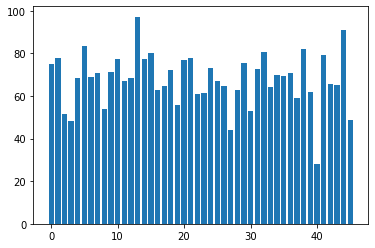

In [5]:
#2
state_list = df['State'].tolist()
x_pos = np.arange(len(state_list))

plt.bar(x_pos, df['Cancer'])
plt.show()

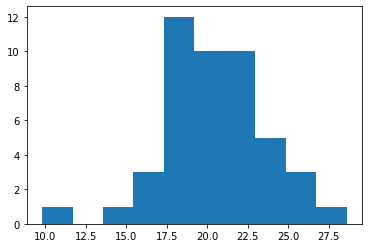

In [6]:
#3
plt.hist(df['Smoke'])
plt.show()

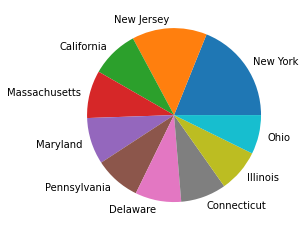

In [7]:
#4
df_ap10 = df.sort_values(by = 'Pollution', ascending = False)[:10]
state_list_ap10 = df_ap10['State'].tolist()

plt.pie(df_ap10['Pollution'], labels = state_list_ap10)
plt.show()

In [8]:
#5
df['Pollution'].describe()
df['Smoke'].describe()
df['Cancer'].describe()

count    46.000000
mean     67.804348
std      12.467807
min      28.000000
25%      62.225000
50%      68.550000
75%      76.650000
max      97.200000
Name: Cancer, dtype: float64

In [9]:
#6
cancer_max = df['Cancer'].max()
cancer_min = df['Cancer'].min()

df['Cancer_scale'] = df['Cancer'].apply(lambda x: (x - cancer_min)/(cancer_max - cancer_min))
df.head()

,State,Pollution,Smoke,Cancer,Cancer_scale
0,Alabama,400,23.3,75.1,0.680636
1,Arkansas,330,23.7,77.7,0.718208
2,California,890,14.9,51.6,0.341040
3,Colorado,440,17.9,48.4,0.294798
4,Connecticut,850,17.0,68.3,0.582370


In [10]:
from statsmodels.formula.api import ols

res1 = ols('Cancer_scale ~ Pollution', data=df).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Cancer_scale   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                   0.08596
Date:                Mon, 29 Aug 2022   Prob (F-statistic):              0.771
Time:                        20:00:07   Log-Likelihood:                 14.116
No. Observations:                  46   AIC:                            -24.23
Df Residuals:                      44   BIC:                            -20.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5614      0.054     10.358      0.000       0.452       0.671
Pollution   2.483e-05   8.47e-05      0.293      0.771      -0.000       0.000
==============================================================================
Omnibus:                        5.818   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.051
Skew:                          -0.528   Prob(JB):                       0.0800
Kurtosis:                       4.233   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
res2 = ols('Cancer_scale ~ Smoke', data=df).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Cancer_scale   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     72.95
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           6.83e-11
Time:                        20:00:07   Log-Likelihood:                 36.556
No. Observations:                  46   AIC:                            -69.11
Df Residuals:                      44   BIC:                            -65.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3358      0.108     -3.111      0.003      -0.553      -0.118
Smoke          0.0446      0.005      8.541      0.000       0.034       0.055
==============================================================================
Omnibus:                       11.738   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.847
Skew:                          -0.822   Prob(JB):                     0.000597
Kurtosis:                       5.246   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#6-1
import statsmodels.api as sm

X1 = df['Pollution']
X2 = df['Smoke']
Y = df['Cancer_scale']

X1 = sm.add_constant(X1)
model1 = sm.OLS(Y, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Cancer_scale   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                   0.08596
Date:                Mon, 29 Aug 2022   Prob (F-statistic):              0.771
Time:                        20:00:08   Log-Likelihood:                 14.116
No. Observations:                  46   AIC:                            -24.23
Df Residuals:                      44   BIC:                            -20.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5614      0.054     10.358      0.000       0.452       0.671
Pollution   2.483e-05   8.47e-05      0.293      0.771      -0.000       0.000
==============================================================================
Omnibus:                        5.818   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.051
Skew:                          -0.528   Prob(JB):                       0.0800
Kurtosis:                       4.233   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y, X2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Cancer_scale   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     72.95
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           6.83e-11
Time:                        20:00:08   Log-Likelihood:                 36.556
No. Observations:                  46   AIC:                            -69.11
Df Residuals:                      44   BIC:                            -65.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3358      0.108     -3.111      0.003      -0.553      -0.118
Smoke          0.0446      0.005      8.541      0.000       0.034       0.055
==============================================================================
Omnibus:                       11.738   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.847
Skew:                          -0.822   Prob(JB):                     0.000597
Kurtosis:                       5.246   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#7
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X = df[df.columns.difference(['State','Cancer','Cancer_scale'])]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 19)

lr = linear_model.LinearRegression()
model = lr.fit(X_train, Y_train)

X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Cancer_scale   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     26.20
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           1.53e-07
Time:                        20:00:08   Log-Likelihood:                 27.757
No. Observations:                  36   AIC:                            -49.51
Df Residuals:                      33   BIC:                            -44.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4192      0.141     -2.971      0.005      -0.706      -0.132
Pollution      0.0001    6.3e-05      1.670      0.104    -2.3e-05       0.000
Smoke          0.0461      0.006      7.232      0.000       0.033       0.059
==============================================================================
Omnibus:                        5.706   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.680
Skew:                          -0.377   Prob(JB):                       0.0584
Kurtosis:                       4.794   Cond. No.                     4.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X = df[df.columns.difference(['State','Cancer','Cancer_scale'])]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 19)

lr = linear_model.LinearRegression()
model = lr.fit(X_train, Y_train)

print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.6136190189873243
0.8618393681155732
